In [3]:
from transformers import GPT2LMHeadModel

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
sd_hf = model_hf.state_dict()


for k,v in sd_hf.items():
    print(k,v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [7]:
#when we see from top .wte is the embeddings where 50257 are the tokens size
#.wpe is the positional encodings where gpt 2 looks at 1024 words behind 

In [8]:
#Take positional embeddings and flatten them to see
sd_hf['transformer.wpe.weight'].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

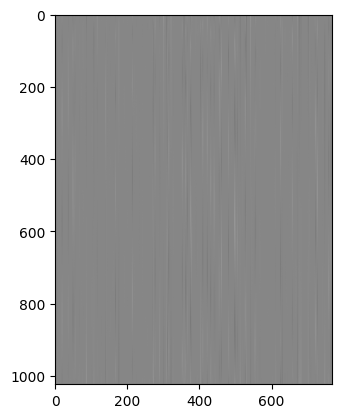

In [9]:
#plot positional Embeddings
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf['transformer.wpe.weight'], cmap="gray")

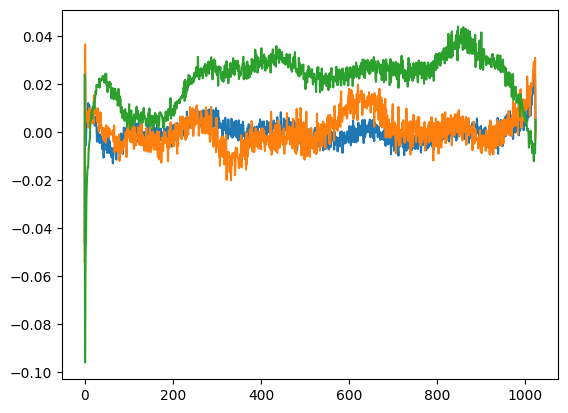

In [11]:
#Individual Columns of all above (768 in total)
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

In [15]:
#Try inference 
from transformers import pipeline,set_seed

In [19]:
"""from transformers import pipeline,set_seed

generator = pipeline('text-generation', model='gpt2')
set_seed(42)

print(generator("Hello, I'm a language model,", max_length=30,num_return_sequences=5))"""

'from transformers import pipeline,set_seed\n\ngenerator = pipeline(\'text-generation\', model=\'gpt2\')\nset_seed(42)\n\nprint(generator("Hello, I\'m a language model,", max_length=30,num_return_sequences=5))'

In [20]:
from transformers import pipeline, set_seed

In [2]:
with open('input.txt', 'r') as f:
    text = f.read()

data = text[:1000] # first 1000 characters
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [3]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:100])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13, 198, 198, 5962, 22307, 25, 198, 1639, 389, 477, 12939, 2138, 284, 4656, 621, 284, 1145, 680, 30, 198, 198, 3237, 25, 198, 4965, 5634, 13, 12939, 13, 198, 198, 5962, 22307, 25, 198, 5962, 11, 345, 760, 327, 1872, 385, 1526, 28599, 318, 4039, 4472, 284, 262, 661, 13, 198, 198, 3237, 25, 198, 1135, 760, 470, 11, 356, 760, 470, 13, 198, 198, 5962, 22307, 25, 198, 5756, 514, 1494, 683, 11, 290, 356]


In [5]:
#Make the train dataset for the GTP (in train.py)
#first create a usual tensor with first 24 tokens
import torch
buf = torch.tensor(tokens[:24])  
x = buf.view(4,6)
print(x)

#As a result first 6 tokens end up being in the first row (stack up every 6 independent raw)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])


In [6]:
#For the convinience we create a label tensor (target tensor y)
import torch
buf = torch.tensor(tokens[:24 + 1])  # +1 for the target tensor
x = buf[:-1].view(4,6)  # We take everything up to the very last token 24th
y = buf[1:].view(4,6) #target tensor starting at index 1
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


### Gradient Accumulation 

In [12]:
import torch

#Simple MLP
net = torch.nn.Sequential(
    torch.nn.Linear(16,32),
    torch.nn.GELU(),
    torch.nn.Linear(32,1)

)

torch.random.manual_seed(42)
x = torch.randn(4,16)
y = torch.randn(4,1)
net.zero_grad()
y_pred = net(x)
loss = torch.nn.functional.mse_loss(y_pred,y)
loss.backward()
print(net[0].weight.grad.view(-1) [:10])

#The loss object due to readuction='mean' in  mse function
# L = 1/4 * [
#            (y[0] - y_pred[0] **2) +
#            (y[1] - y_pred[1] **2) +
#            (y[2] - y_pred[2] **2) +
#            (y[3] - y_pred[3] **2) +]

#Note: 1/4 ! 

tensor([-0.0150,  0.0011,  0.0042, -0.0040,  0.0059, -0.0080, -0.0078, -0.0138,
        -0.0103, -0.0134])


In [13]:
#Gradient Accumulation version of above NN
#Accumulation_steps = 4,  B = 1
#The loss here is different because
#accumulation in gradient <--> Sum in loss
#EX: We instead get;
#           L0 = (y[0] - y_pred[0] **2) +
#           L1 = (y[1] - y_pred[1] **2) +
#           L2 = (y[2] - y_pred[2] **2) +
#           L3 = (y[3] - y_pred[3] **2) 

#L = L0 + L1 + L2 + L3 
#Note: the normalizer of 1/4 is lost


net.zero_grad()
for i in range(4):
    y_pred = net(x[i])
    loss = torch.nn.functional.mse_loss(y_pred,y[i])
    loss = loss  # Normalize by accum steps
    loss.backward()
print(net[0].weight.grad.view(-1)[:10])

#Gradients are not the same : (  Why?....  MSE is lost so what we do is before we go for a backward pass we normalize by dividin accum steps
#Same applys for cross entropy

tensor([-0.0598,  0.0042,  0.0167, -0.0161,  0.0235, -0.0320, -0.0311, -0.0550,
        -0.0410, -0.0536])


In [ ]:
# parse and visualize the logfile
#Coppied from nanoGPT repo (andrej karpathy's)

import numpy as nps
import matplotlib.pyplot as plt
%matplotlib inline



sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# load the log file
with open("./log/log.txt", "r") as f:
    lines = f.readlines()

# parse the individual lines, group by stream (train,val,hella)
streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

# convert each stream from {step: val} to (steps[], vals[])
# so it's easier for plotting
streams_xy = {}
for k, v in streams.items():
    # get all (step, val) items, sort them
    xy = sorted(list(v.items()))
    # unpack the list of tuples to tuple of lists
    streams_xy[k] = list(zip(*xy))

# create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'nanogpt ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'nanogpt ({sz}) val loss')
# horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(top=4.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

# Panel 2: HellaSwag eval
plt.subplot(122)
xs, ys = streams_xy["hella"] # HellaSwag eval
ys = np.array(ys)
plt.plot(xs, ys, label=f"nanogpt ({sz})")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
print("Max Hellaswag eval:", max(ys))

FileNotFoundError: [Errno 2] No such file or directory: './log/log.txt'